In [4]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
thesis_dir = '/home/azstephe/liverRegression/regression_liver/data/figs/'

colors = {
        'Rat': '#94c4be',      
        'Macaque': '#89a1b6',
        'Cow': '#d1c177',      
        'Pig': '#d59698',
        'Mouse': '#a3a3a3'
}

darks = {
        'Rat': '#7ea7a2',      
        'Macaque': '#74899b',
        'Cow': '#bfb164',      
        'Pig': '#b67076',
        'Mouse': '#8e8e8e'
}

lights = {
        'Rat': '#aadfda',      
        'Macaque': '#9eb9d1',
        'Cow': '#e3d289',      
        'Pig': '#f4b9bb',
        'Mouse': '#b6b6b6'
}
def histogram(pred_df, name, status):
    species = status.split(' ')[-1]
    plt.hist(pred_df, bins=50, color=colors[species])
    plt.xlim(0,4.1)
    plt.xlabel(f'{name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of {status}')
    # plt.savefig(f"{thesis_dir}{direc}{status.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    plt.show()

def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_test = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-test: {pearson_p_test:.4g}")
    
    spearman_corr, spearman_p_test = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-test: {spearman_p_test:.4g}")
    return pearson_corr, pearson_p_test, spearman_corr, spearman_p_test

def scatter(pred_df, true_df, title, xlabel, ylabel, r, rho):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')

    textstr = f'$r$ = {r:.2f}\n$\\rho$ = {rho:.2f}'
    plt.text(0.07, 0.93, textstr, transform=plt.gca().transAxes,
         fontsize=16, verticalalignment='top')

    plt.grid(True)
    plt.show()
def pearson_spearman(x, y):
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")

    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

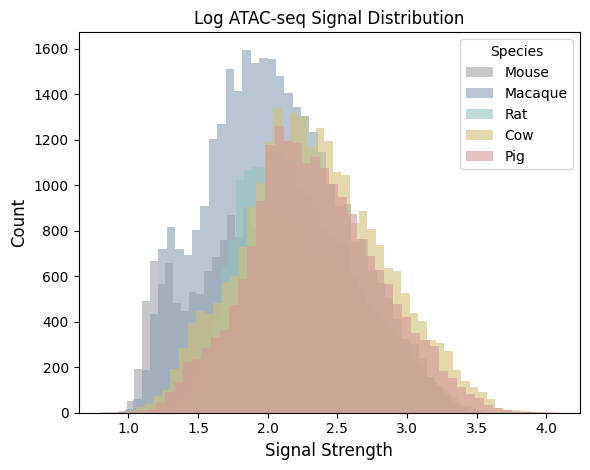

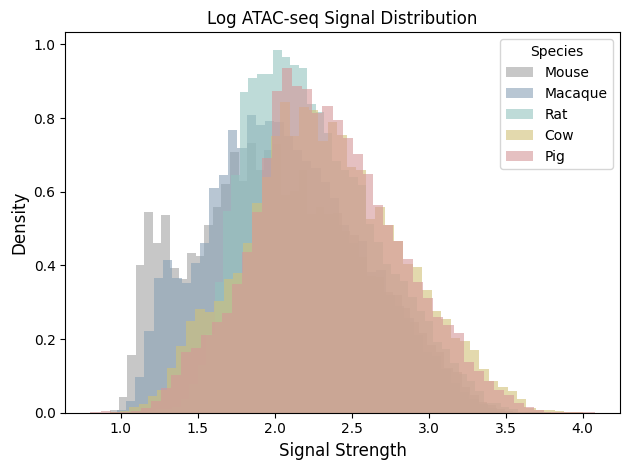

In [18]:
# histogram of logged overlay all 5 species
import pandas as pd
import matplotlib.pyplot as plt
direc = 'distrib_hist/'

files = {
    'Mouse': '/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed',
    'Macaque': '/home/azstephe/liverRegression/regression_liver/data/log/macaque_liver_pos_ALL.bed',
    'Rat': '/home/azstephe/liverRegression/regression_liver/data/log/rat_liver_pos_ALL.bed',
    'Cow': '/home/azstephe/liverRegression/regression_liver/data/log/cow_liver_pos_ALL.bed',
    'Pig': '/home/azstephe/liverRegression/regression_liver/data/log/pig_liver_pos_ALL.bed'
}

# Plot all histograms on the same figure
plt.figure(figsize=(6, 4.8))

for species, path in files.items():
    df = pd.read_csv(path, header=None, sep='\t')
    plt.hist(df[4], bins=50, alpha=0.6, label=species, color=colors[species])

plt.xlabel('Signal Strength', size='large')
plt.ylabel('Count', size='large')
plt.title('Log ATAC-seq Signal Distribution')
plt.legend(title="Species")
plt.tight_layout()
# plt.savefig(f"{thesis_dir}{direc}log5_overlay_count.jpg", dpi=300, bbox_inches='tight')
plt.show()

for species, path in files.items():
    df = pd.read_csv(path, header=None, sep='\t')
    plt.hist(df[4], bins=50, alpha=0.6, label=species, color=colors[species], density=True)

plt.xlabel('Signal Strength', size='large')
plt.ylabel('Density', size='large')
plt.title('Log ATAC-seq Signal Distribution')
plt.legend(title="Species")
plt.tight_layout()
# plt.savefig(f"{thesis_dir}{direc}log5_overlay_density.jpg", dpi=300, bbox_inches='tight')
plt.show()


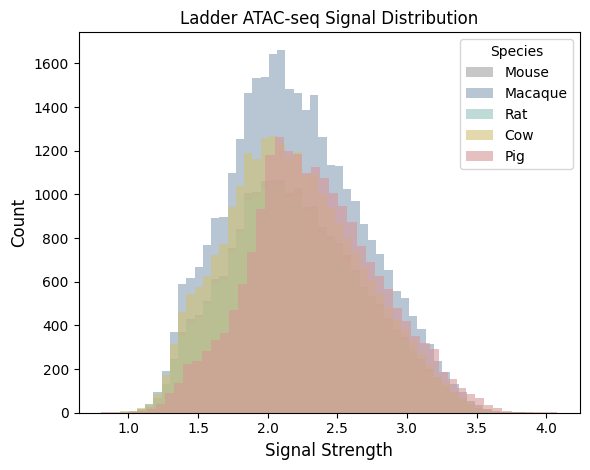

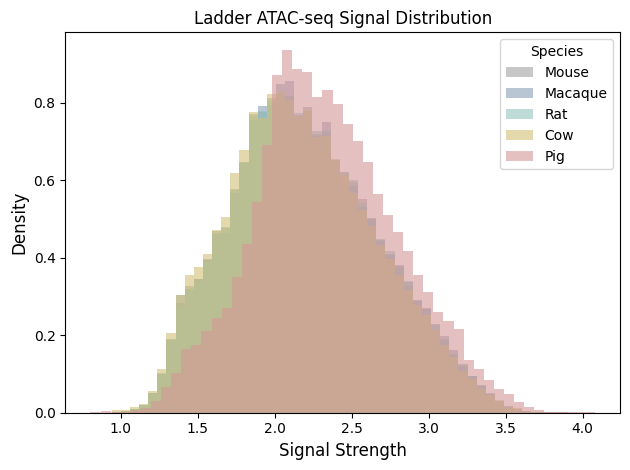

In [49]:
# histogram of ladder overlay all 5 species
import pandas as pd
import matplotlib.pyplot as plt
direc = 'distrib_hist/'
# Define file paths and labels
files = {
    'Mouse': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/mouse_liver_pos_ALL.bed',
    'Macaque': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/macaque_liver_pos_ALL.bed',
    'Rat': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/rat_liver_pos_ALL.bed',
    'Cow': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/cow_liver_pos_ALL.bed',
    'Pig': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/pig_liver_pos_ALL.bed'
}

# Plot all histograms on the same figure
plt.figure(figsize=(6, 4.8))

for species, path in files.items():
    df = pd.read_csv(path, header=None, sep='\t')
    plt.hist(df[4], bins=50, alpha=0.6, label=species, color=colors[species])

plt.xlabel('Signal Strength', size='large')
plt.ylabel('Count', size='large')
plt.title('Ladder ATAC-seq Signal Distribution')
plt.legend(title="Species")
plt.tight_layout()
# plt.savefig(f"{thesis_dir}{direc}ladder5_overlay_count.jpg", dpi=300, bbox_inches='tight')
plt.show()

for species, path in files.items():
    df = pd.read_csv(path, header=None, sep='\t')
    plt.hist(df[4], bins=50, alpha=0.6, label=species, color=colors[species], density=True)

plt.xlabel('Signal Strength', size='large')
plt.ylabel('Density', size='large')
plt.title('Ladder ATAC-seq Signal Distribution')
plt.legend(title="Species")
plt.tight_layout()
# plt.savefig(f"{thesis_dir}{direc}ladder5_overlay_density.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# histogram of ladder vs logged overlay all 5 species
import pandas as pd
import matplotlib.pyplot as plt
direc = 'distrib_hist/'

files = {
    'Mouse': '/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed',
    'Macaque': '/home/azstephe/liverRegression/regression_liver/data/log/macaque_liver_pos_ALL.bed',
    'Rat': '/home/azstephe/liverRegression/regression_liver/data/log/rat_liver_pos_ALL.bed',
    'Cow': '/home/azstephe/liverRegression/regression_liver/data/log/cow_liver_pos_ALL.bed',
    'Pig': '/home/azstephe/liverRegression/regression_liver/data/log/pig_liver_pos_ALL.bed'
}

files_ladder = {
    'Mouse': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/mouse_liver_pos_ALL.bed',
    'Macaque': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/macaque_liver_pos_ALL.bed',
    'Rat': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/rat_liver_pos_ALL.bed',
    'Cow': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/cow_liver_pos_ALL.bed',
    'Pig': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/pig_liver_pos_ALL.bed'
}
# for species in files:
#     plt.figure(figsize=(6, 4))
    
#     # Load original and ladder-normalized signals (assumes signal is in column 5)
#     original = pd.read_csv(files[species], sep='\t', header=None).iloc[:, 4]
#     ladder = pd.read_csv(files_ladder[species], sep='\t', header=None).iloc[:, 4]

#     # Plot both histograms on the same axes
#     plt.hist(original, bins=50, alpha=0.5, label='Original', density=True, color='#d59698')
#     plt.hist(ladder, bins=50, alpha=0.5, label='Ladder QN', density=True, color='#94c4b3')

#     plt.title(f'{species} Signal Distribution')
#     plt.xlabel('Signal (column 5)')
#     plt.ylabel('Density')
#     plt.legend()
#     plt.tight_layout()
#     # plt.show()

dfs_original = []
for species, path in files.items():
    df = pd.read_csv(path, sep='\t', header=None)
    df['species'] = species
    dfs_original.append(df)

df_original = pd.concat(dfs_original, ignore_index=True)

# Concatenate ladder-normalized files
dfs_ladder = []
for species, path in files_ladder.items():
    df = pd.read_csv(path, sep='\t', header=None)
    df['species'] = species
    df['source'] = 'ladder_qn'
    dfs_ladder.append(df)

df_ladder = pd.concat(dfs_ladder, ignore_index=True)

plt.figure(figsize=(6, 4.8))

plt.hist(df_original.iloc[:, 4], bins=50, alpha=0.5, label='Log', density=True, color='#d59698')
plt.hist(df_ladder, bins=50, alpha=0.5, label='Ladder QN', density=True)

plt.title(f'Signal Distribution')
plt.xlabel('Signal Strength')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
# plt.savefig(f"{thesis_dir}{direc}log_ladder_overlay_density.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [83]:
# test log scatter

direc='test_scatter/'
def mean_squared_error(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean((y_true - y_pred) ** 2)
    
def scatter(pred_df, true_df, title, xlabel, ylabel, r, rho, mse):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(6, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')

    textstr = f'$r$ = {r:.2f}\n$\\rho$ = {rho:.2f}\nmse = {mse:.2f}'
    plt.text(0.07, 0.93, textstr, transform=plt.gca().transAxes,
         fontsize=16, verticalalignment='top')
    plt.grid(True)
    plt.savefig(f"{thesis_dir}{direc}{title.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close()

species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['macaque']

model_list = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s']
# model_list = ['bdbi7l3n']
for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        print(f'average test1 prediction: {pred_test1_df.mean()}')
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        print(f'average neg test prediction: {pred_neg_df.mean()}')
        
        
        test2R, test2RP, test2Rho, test2RhoP = correlations(pred_test2_df, doubled_test2_df, 'test2')
        test3R, test3RP, test3Rho, test3RhoP = correlations(pred_test3_df, doubled_test3_df, 'test3')
        orthoR, orthoRP, orthoRho, orthoRhoP = correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')
        test2Mse = mean_squared_error(doubled_test2_df, pred_test2_df)
        test3Mse = mean_squared_error(doubled_test3_df, pred_test3_df)
        orthoMse = mean_squared_error(pred_pos_df, doubled_pos_df)
        
        scatter(pred_test2_df, doubled_test2_df, f'{species.capitalize()} Prediction Accuracy for Test2 ({model})', 'True', 'Predicted', test2R, test2Rho, test2Mse)
        scatter(pred_test3_df, doubled_test3_df, f'{species.capitalize()} Prediction Accuracy for Test3 ({model})', 'True', 'Predicted', test3R, test3Rho, test3Mse)
        scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for orthologs ({model})', 'True', 'Predicted', orthoR, orthoRho, orthoMse)

species = 'mouse'
for model in model_list:
    pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)

    pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
    neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
    neg_len = 2*len(neg_df)
    pos_len = 2*len(pos_df)
        
        # input sanity check
    if len(pred_orthologs_df) != neg_len+pos_len:
        print("ERROR: predictions are a different length than testidation sets")

    doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
    pred_pos_df = pred_orthologs_df.head(pos_len)
    pred_neg_df = pred_orthologs_df.tail(neg_len)

    print(f'average neg test prediction: {pred_neg_df.mean()}')
    
    orthoR, orthoRP, orthoRho, orthoRhoP = correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')
    orthoMse = mean_squared_error(pred_pos_df, doubled_pos_df)
    scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for orthologs ({model})', 'True', 'Predicted', orthoR, orthoRho, orthoMse)


macaque

bdbi7l3n
average test1 prediction: 0    0.583191
dtype: float64
average neg test prediction: 0    0.603672
dtype: float64

kf8188qf
average test1 prediction: 0    0.357121
dtype: float64
average neg test prediction: 0    0.432265
dtype: float64

cq45eb2s
average test1 prediction: 0    0.340474
dtype: float64
average neg test prediction: 0    0.423174
dtype: float64

rat

bdbi7l3n
average test1 prediction: 0    0.672014
dtype: float64
average neg test prediction: 0    0.65953
dtype: float64

kf8188qf
average test1 prediction: 0    0.570226
dtype: float64
average neg test prediction: 0    0.555186
dtype: float64

cq45eb2s
average test1 prediction: 0    0.543555
dtype: float64
average neg test prediction: 0    0.515853
dtype: float64

cow

bdbi7l3n
average test1 prediction: 0    0.592015
dtype: float64
average neg test prediction: 0    0.619083
dtype: float64

kf8188qf
average test1 prediction: 0    0.390403
dtype: float64
average neg test prediction: 0    0.482266
dtype: float6

In [89]:
# test log csv
# direc='test_scatter/'

def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_test = scipy.stats.pearsonr(x, y)
    spearman_corr, spearman_p_test = scipy.stats.spearmanr(x, y)
    return pearson_corr, pearson_p_test, spearman_corr, spearman_p_test

def mean_squared_error(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean((y_true - y_pred) ** 2)

species_list = ['macaque', 'rat', 'cow', 'pig']
summary_data = []
model_list = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s', '584e37fx', 'pl0eibis', 'baa0j5fp', 'dtbxi7l8', 'r19ftp2z', 't1e5p40r', '7vsdq5k2', 'wnfdrgcc', '8i7h7nsh', 'ph4wrpxu'] 
for species in species_list:
    for model in model_list:
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        test2R, test2RP, test2Rho, test2RhoP = correlations(pred_test2_df, doubled_test2_df, 'test2')
        test3R, test3RP, test3Rho, test3RhoP = correlations(pred_test3_df, doubled_test3_df, 'test3')
        orthoR, orthoRP, orthoRho, orthoRhoP = correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')

        test2Mse = mean_squared_error(doubled_test2_df, pred_test2_df)
        test3Mse = mean_squared_error(doubled_test3_df, pred_test3_df)
        orthoMse = mean_squared_error(pred_pos_df, doubled_pos_df)
        

        summary_data += [
            {'species': species, 'metric': 'test2_pearson', 'model': model, 'value': test2R},
            {'species': species, 'metric': 'test2_spearman', 'model': model, 'value': test2Rho},
            {'species': species, 'metric': 'test2_MSE', 'model': model, 'value': test2Mse},
            {'species': species, 'metric': 'test3_pearson', 'model': model, 'value': test3R},
            {'species': species, 'metric': 'test3_spearman', 'model': model, 'value': test3Rho},
            {'species': species, 'metric': 'test3_MSE', 'model': model, 'value': test3Mse},
            {'species': species, 'metric': 'orthologs_pearson', 'model': model, 'value': orthoR},
            {'species': species, 'metric': 'orthologs_spearman', 'model': model, 'value': orthoRho},
            {'species': species, 'metric': 'orthologs_MSE', 'model': model, 'value': orthoMse},
            {'species': species, 'metric': 'avg_test1_pred', 'model': model, 'value': pred_test1_df.mean().values[0]},
            {'species': species, 'metric': 'avg_neg_pred', 'model': model, 'value': pred_neg_df.mean().values[0]}
        ]

species = 'mouse'
for model in model_list:
    pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)

    pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
    neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
    neg_len = 2*len(neg_df)
    pos_len = 2*len(pos_df)
        
        # input sanity check
    if len(pred_orthologs_df) != neg_len+pos_len:
        print("ERROR: predictions are a different length than testidation sets")

    doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
    pred_pos_df = pred_orthologs_df.head(pos_len)
    pred_neg_df = pred_orthologs_df.tail(neg_len)
    
    orthoR, orthoRP, orthoRho, orthoRhoP = correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')
    orthoMse = mean_squared_error(pred_pos_df, doubled_pos_df)
    
    # scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for orthologs ({model})', 'True', 'Predicted', orthoR, orthoRho)
    summary_data += [
            {'species': species, 'metric': 'orthologs_pearson', 'model': model, 'value': orthoR},
            {'species': species, 'metric': 'orthologs_spearman', 'model': model, 'value': orthoRho},
            {'species': species, 'metric': 'avg_neg_pred', 'model': model, 'value': pred_neg_df.mean().values[0]},
            {'species': species, 'metric': 'orthologs_MSE', 'model': model, 'value': orthoMse}
    ]

summary_df = pd.DataFrame(summary_data)

# Pivot to have models as columns
summary_pivot = summary_df.pivot(index=['species', 'metric'], columns='model', values='value').reset_index()

# Export to CSV
# summary_pivot.to_csv('correlation_summary.csv', index=False)

summary_pivot = summary_pivot[['species', 'metric', 'bdbi7l3n', '7vsdq5k2', 'wnfdrgcc', '8i7h7nsh', 'ph4wrpxu', 'kf8188qf', 'r19ftp2z', 't1e5p40r', 'cq45eb2s', '584e37fx', 'pl0eibis', 'baa0j5fp', 'dtbxi7l8']]
summary_pivot
summary_pivot.to_csv('/home/azstephe/liverRegression/regression_liver/data/figs/tables/log_correlation_summary.csv', index=False)


model,species,metric,bdbi7l3n,7vsdq5k2,wnfdrgcc,8i7h7nsh,ph4wrpxu,kf8188qf,r19ftp2z,t1e5p40r,cq45eb2s,584e37fx,pl0eibis,baa0j5fp,dtbxi7l8
0,cow,avg_neg_pred,0.619083,0.617863,0.672667,0.687981,0.688570,0.482266,0.513147,0.513484,0.460363,0.405870,0.464563,0.486404,0.479002
1,cow,avg_test1_pred,0.592015,0.576881,0.636212,0.653441,0.657268,0.390403,0.437075,0.422647,0.352554,0.317331,0.385729,0.391894,0.380224
2,cow,orthologs_MSE,2.370557,2.066166,1.976742,1.944116,2.083280,1.350156,1.631981,1.491681,1.494386,1.610940,1.644920,1.417506,1.551630
3,cow,orthologs_pearson,0.376930,0.363094,0.357783,0.356239,0.366033,0.416404,0.408012,0.395985,0.471462,0.454969,0.465662,0.411823,0.432398
4,cow,orthologs_spearman,0.385247,0.371623,0.363393,0.361609,0.376592,0.426720,0.412492,0.407045,0.481508,0.471449,0.471818,0.423159,0.441883
5,cow,test2_MSE,2.375000,1.948895,1.936870,1.927530,2.041518,1.178298,1.505148,1.352182,1.338721,1.435325,1.494776,1.301738,1.467534
6,cow,test2_pearson,0.363639,0.354751,0.343457,0.357500,0.354760,0.415976,0.374881,0.388587,0.446161,0.448264,0.467328,0.401545,0.403850
7,cow,test2_spearman,0.363581,0.350599,0.340805,0.351536,0.359768,0.440106,0.379221,0.399241,0.470251,0.479999,0.477699,0.410259,0.416280
8,cow,test3_MSE,2.290293,2.050648,1.908423,1.886908,2.024875,1.370149,1.641813,1.506694,1.500890,1.659990,1.676626,1.434320,1.532311
9,cow,test3_pearson,0.318532,0.303308,0.324417,0.311512,0.315306,0.381695,0.377268,0.371406,0.424156,0.418390,0.392153,0.372401,0.407346



macaque

bdbi7l3n
average test1 prediction: 0.5831912033168104
Mann–Whitney U Test for test1:
Test Statistic: 53461.0000
P-Value: 0
There is a significant difference between the two distributions (reject null hypothesis).
average neg test prediction: 0.6036721665808168
Mann–Whitney U Test for neg test set:
Test Statistic: 177537.0000
P-Value: 0
There is a significant difference between the two distributions (reject null hypothesis).
average val1 prediction: 0.5865366850787392


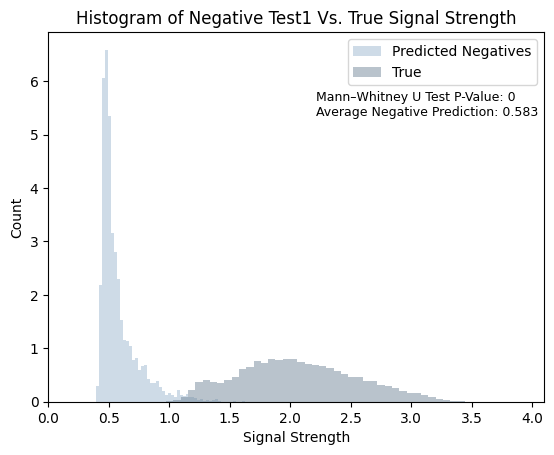

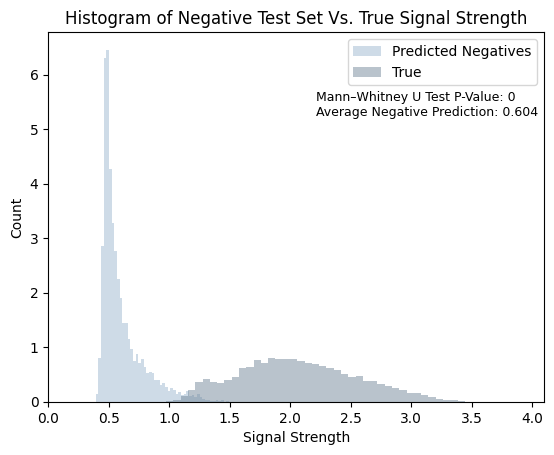


rat

bdbi7l3n
average test1 prediction: 0.6720142274478504
Mann–Whitney U Test for test1:
Test Statistic: 2193.0000
P-Value: 0
There is a significant difference between the two distributions (reject null hypothesis).
average neg test prediction: 0.6595297161224745
Mann–Whitney U Test for neg test set:
Test Statistic: 17408.0000
P-Value: 0
There is a significant difference between the two distributions (reject null hypothesis).
average val1 prediction: 0.6862805986851153


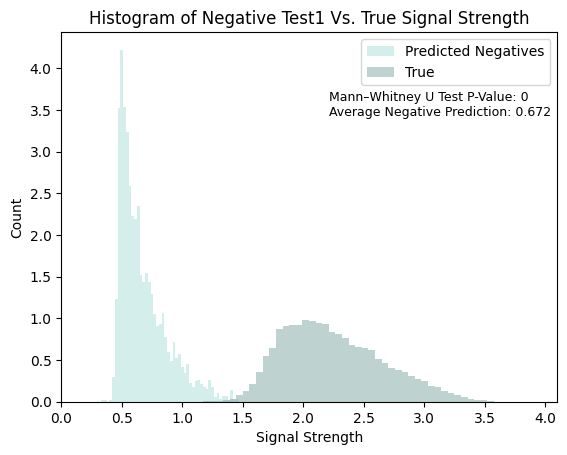

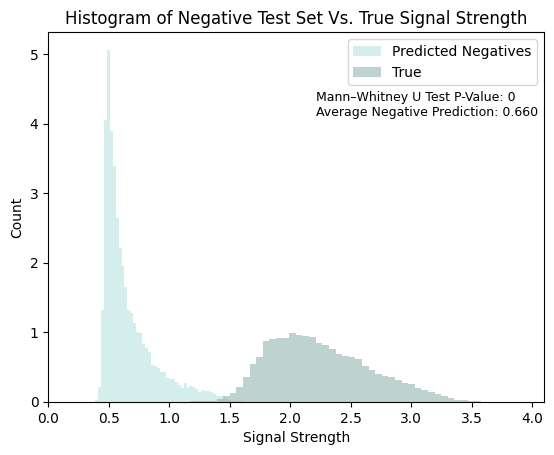


cow

bdbi7l3n
average test1 prediction: 0.5920153756736997
Mann–Whitney U Test for test1:
Test Statistic: 10288.0000
P-Value: 0
There is a significant difference between the two distributions (reject null hypothesis).
average neg test prediction: 0.6190834491369623
Mann–Whitney U Test for neg test set:
Test Statistic: 37296.0000
P-Value: 0
There is a significant difference between the two distributions (reject null hypothesis).
average val1 prediction: 0.6012977871043963


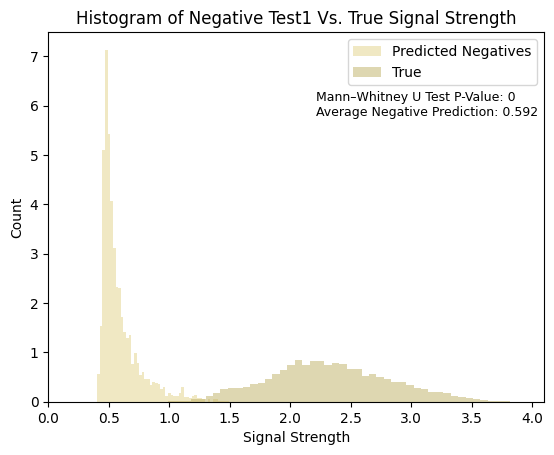

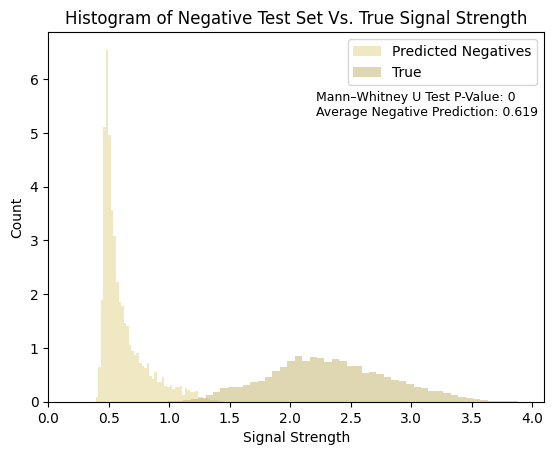


pig

bdbi7l3n
average test1 prediction: 0.5983156554576634
Mann–Whitney U Test for test1:
Test Statistic: 8362.0000
P-Value: 0
There is a significant difference between the two distributions (reject null hypothesis).
average neg test prediction: 0.6246236641113837
Mann–Whitney U Test for neg test set:
Test Statistic: 31297.0000
P-Value: 0
There is a significant difference between the two distributions (reject null hypothesis).
average val1 prediction: 0.6008704631268765


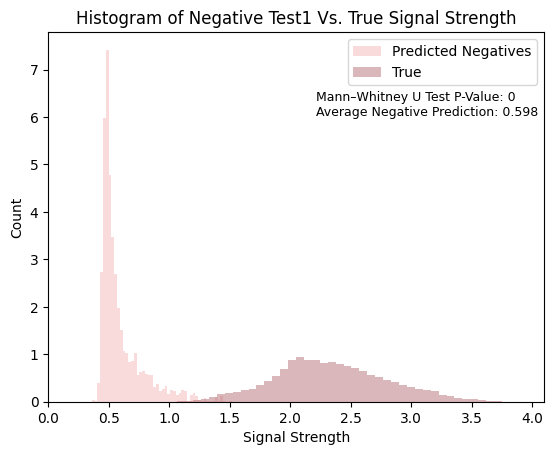

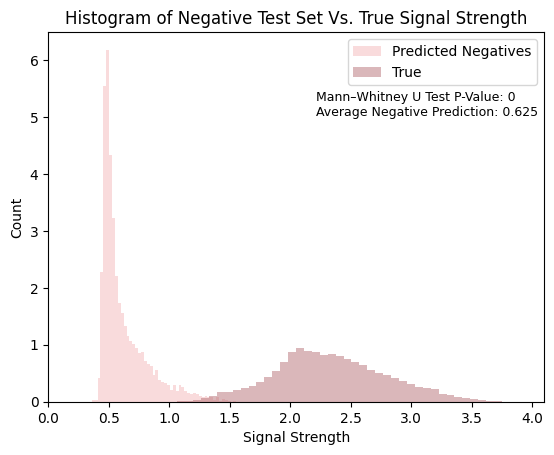

mouse

average neg test prediction: 0.6091562003633045
Mann–Whitney U Test for neg test set:
Test Statistic: 258478.0000
P-Value: 0
There is a significant difference between the two distributions (reject null hypothesis).


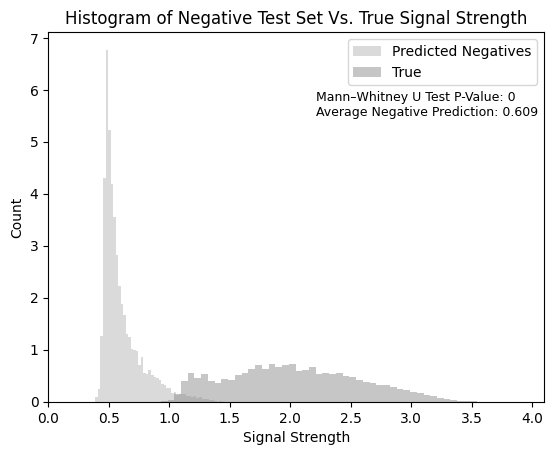

In [53]:
# nonmouse negative histograms
from scipy.stats import mannwhitneyu
direc = 'neg_hist/'

def histogram(pred_df, original_df, name, title, p_val, species, neg_pred_value):
    plt.hist(pred_df, bins=50, label='Predicted Negatives', alpha=0.5, color=lights[species.capitalize()], density=True)
    plt.hist(original_df, bins=50, label='True', alpha=0.5, color=darks[species.capitalize()], density=True)
    plt.xlim(0,4.1)
    plt.xlabel(f'{name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of {title}')
    textstr = f'Mann–Whitney U Test P-Value: {p_value:.4g}\nAverage Negative Prediction: {neg_pred_value:.3f}'
    plt.text(0.54, 0.84, textstr, transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top')
    plt.legend()
    plt.savefig(f"{thesis_dir}{direc}{species}_{title.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    plt.show()

def mannwhit(pred_df, original_df, name):
    x = pred_df.squeeze()
    y = original_df.squeeze()
        
    stat, p_value = mannwhitneyu(x, y, alternative='two-sided')
        
    print(f"Mann–Whitney U Test for {name}:")
    print(f"Test Statistic: {stat:.4f}")
    print(f"P-Value: {p_value:.4g}")
        
        # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")
    return p_value
species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['macaque']

# model_list = ['bdbi7l3n']
model_list = []
for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')

        original_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', header=None, sep='\t').iloc[:,4]
        
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)

        print(f'average test1 prediction: {pred_test1_df.mean()[0]}')
        
        p_val_test1 = mannwhit(pred_test1_df, original_df, 'test1')        
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST_orthologs.csv', header=None)

        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        print(f'average neg test prediction: {pred_neg_df.mean()[0]}')
        p_val_neg = mannwhit(pred_neg_df, original_df, 'neg test set')  
        

        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
        
        val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        
        val1_len = 2*len(val1_df)
        
        doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_val1_df = pred_df.head(val1_len)
        
        print(f'average val1 prediction: {pred_val1_df.mean()[0]}')
        
        histogram(pred_test1_df, original_df, 'Signal Strength', 'Negative Test1 Vs. True Signal Strength', p_val_test1, species, pred_test1_df.mean()[0])
        histogram(pred_neg_df, original_df, 'Signal Strength', 'Negative Test Set Vs. True Signal Strength', p_val_neg, species, pred_neg_df.mean()[0])

species = 'mouse'
print('mouse\n')
original_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', header=None, sep='\t').iloc[:,4]

pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/mouse_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
neg_len = 2*len(neg_df)
        
doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
pred_neg_df = pred_df.tail(neg_len)

print(f'average neg test prediction: {pred_neg_df.mean()[0]}')
p_val_neg = mannwhit(pred_neg_df, original_df, 'neg test set')  
        
histogram(pred_neg_df, original_df, 'Signal Strength', 'Negative Test Set Vs. True Signal Strength', p_val_neg, species, pred_neg_df.mean()[0])


bdbi7l3n
average neg test prediction: 0.6091562003633045
Mann–Whitney U Test for neg test set:
Test Statistic: 258478.0000
P-Value: 0
There is a significant difference between the two distributions (reject null hypothesis).


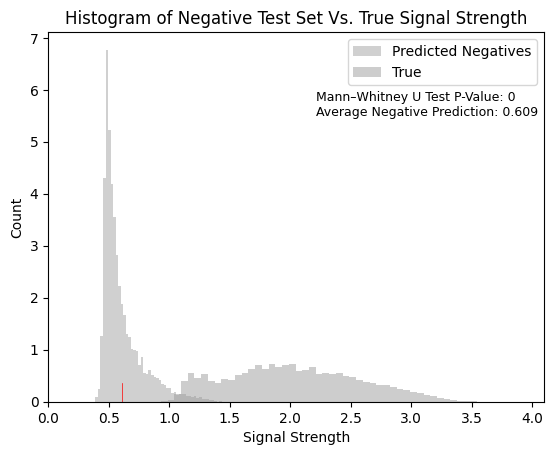

In [47]:
# mouse negative histograms
from scipy.stats import mannwhitneyu
def histogram(pred_df, original_df, name, title, p_val, species, neg_pred_value):
    plt.hist(pred_df, bins=50, label='Predicted Negatives', alpha=0.5, color=colors[species.capitalize()], density=True)
    plt.hist(original_df, bins=50, label='True', alpha=0.5, color=colors['darkgray'], density=True)
    plt.xlim(0,4.1)
    plt.xlabel(f'{name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of {title}')
    textstr = f'Mann–Whitney U Test P-Value: {p_value:.4g}\nAverage Negative Prediction: {neg_pred_value:.3f}'
    plt.text(0.54, 0.84, textstr, transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top')
    plt.axvline(x=neg_pred_value, ymin=0, ymax=0.05, color='red', linestyle='-', linewidth=0.5)
    plt.legend()
    # plt.savefig(f"{thesis_dir}{direc}{species}_{title.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    plt.show()

def mannwhit(pred_df, original_df, name):
    x = pred_df.squeeze()
    y = original_df.squeeze()
        
    stat, p_value = mannwhitneyu(x, y, alternative='two-sided')
        
    print(f"Mann–Whitney U Test for {name}:")
    print(f"Test Statistic: {stat:.4f}")
    print(f"P-Value: {p_value:.4g}")
        
        # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")
    return p_value

species = 'mouse'
model_list = ['bdbi7l3n']
for model in model_list:
    print(f'\n{model}')
    
    original_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', header=None, sep='\t').iloc[:,4]

    pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
    neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/mouse_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
    neg_len = 2*len(neg_df)
        
    doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
    pred_neg_df = pred_df.tail(neg_len)

    print(f'average neg test prediction: {pred_neg_df.mean()[0]}')
    p_val_neg = mannwhit(pred_neg_df, original_df, 'neg test set')  
        
    histogram(pred_neg_df, original_df, 'Signal Strength', 'Negative Test Set Vs. True Signal Strength', p_val_neg, species, pred_neg_df.mean()[0])


In [154]:
def highlight_max(row):
    numeric_values = row.iloc[2:]  # adjust index based on your actual layout
    max_val = numeric_values.max()
    return ['' if i < 2 else 'background-color: yellow' if val == max_val else '' 
            for i, val in enumerate(row)]

df = summary_pivot.iloc[:,list(range(0, 2)) + list(range(10, 15))]
styled_df = df.style.apply(highlight_max, axis=1)
best_summary = summary_pivot.iloc[:,list(range(0, 2)) + [2, 7, 10]]
best_summary
label_map = {
    'avg_neg_pred': 'Avg Neg Prediction',
    'avg_test1_pred': 'Avg Test1 Prediction',
    'orthologs_MSE': 'Test Set MSE',
    'orthologs_pearson': f'Test Set $r$',
    'orthologs_spearman': f'Test set  $\\rho$',
    'test2_MSE': 'Test 2 MSE',
    'test2_pearson': f'Test2 Set $r$',
    'test2_spearman': f'Test2 Set $\\rho$',
    'test3_MSE': 'Test 3 MSE',
    'test3_pearson': f'Test3 Set $r$',
    'test3_spearman': f'Test3 Set $\\rho$',
}

best_summary['metric'] = best_summary['metric'].replace(label_map)

/tmp/ipykernel_13483/3669967585.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_summary['metric'] = best_summary['metric'].replace(label_map)


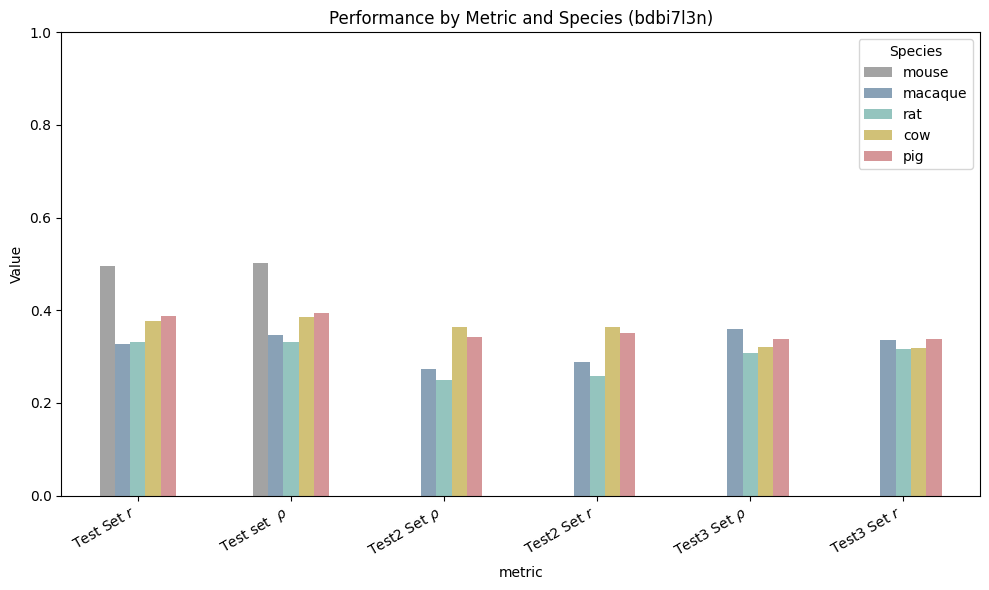

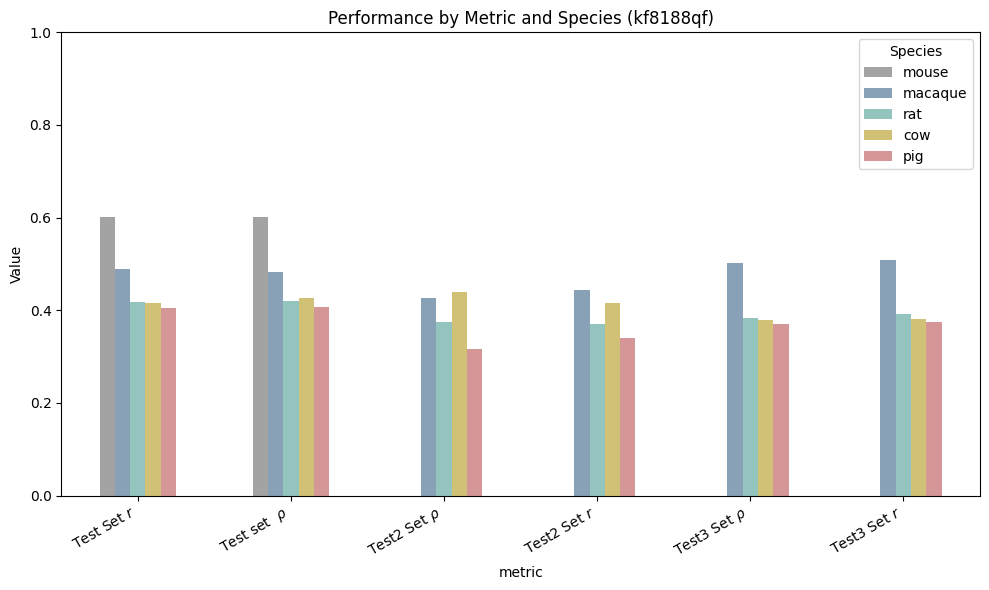

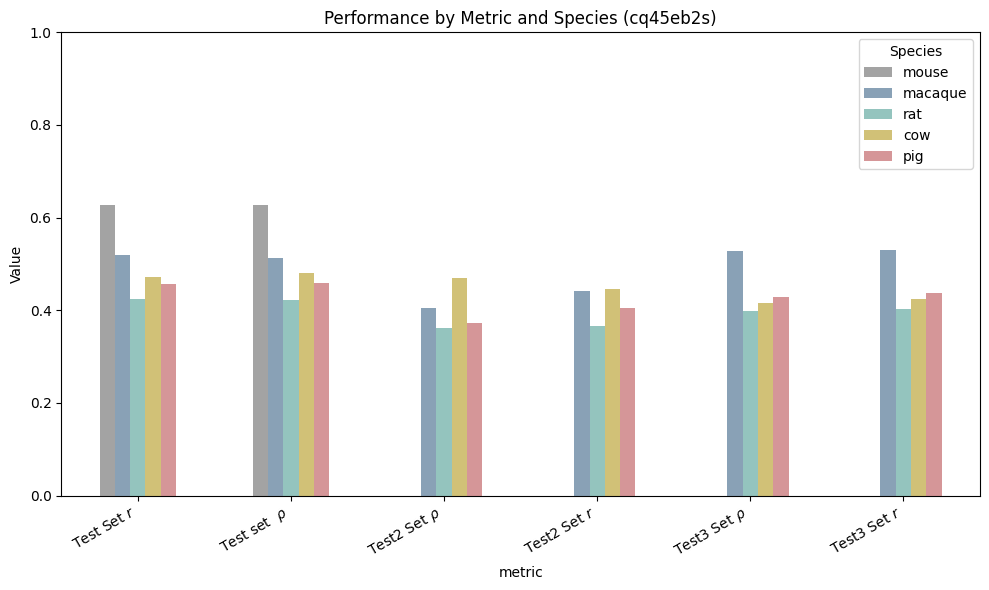

In [160]:
# pearson and spearman bar chart
import pandas as pd
import matplotlib.pyplot as plt
direc = '3BestModels_bar/'
species_order = ['mouse', 'macaque', 'rat', 'cow', 'pig']

models = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s']

non_mse_df = best_summary[~best_summary['metric'].str.contains('MSE|Prediction', regex=True)]

# Create one bar plot per model
for model in models:
    # Pivot table: metrics as rows, species as columns
    data = non_mse_df.pivot(index='metric', columns='species', values=model)

    # Reorder columns (species)
    data = data[species_order]

    ax = data.plot(kind='bar', figsize=(10, 6), color=[colors[sp.capitalize()] for sp in species_order])
    
    ax.set_title(f'Performance by Metric and Species ({model})')
    ax.set_ylabel('Value')
    plt.xticks(rotation=30, ha='right')
    plt.legend(title='Species')
    plt.ylim(0, 1)
    plt.tight_layout()
    # plt.savefig(f"{thesis_dir}{direc}{model}_r_rho.png", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close

mse_df = best_summary[best_summary['metric'].str.contains('MSE|Prediction', regex=True)]

mse_metrics = mse_df['metric'].unique()

# Plot MSE metrics separately for each model
for model in models:
    # Pivot table with metrics as rows and species as columns
    data = mse_df.pivot(index='metric', columns='species', values=model)
    
    # Reorder species columns
    data = data[species_order]

    ax = data.plot(kind='bar', figsize=(10, 6), color=[colors[sp.capitalize()] for sp in species_order])
    ax.set_title(f'MSE+pred Metrics by Species ({model})')
    ax.set_ylabel('Value')
    plt.xticks(rotation=30, ha='right')
    plt.legend(title='Species')
    plt.tight_layout()
    plt.ylim(0, 2.5)
    # plt.savefig(f"{thesis_dir}{direc}{model}_mse_pred.png", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close()

macaque
bdbi7l3n
# of same sign for true difference and predicted difference: 466 / 798 = 0.5839598997493735 %
# of same sign for true difference and averaged predicted difference: 240 / 399.0 = 0.6015037593984962%
Pearson correlation coefficient: 0.2124, p-value: 1.37e-09
Spearman correlation coefficient: 0.2022, p-value: 8.237e-09
None


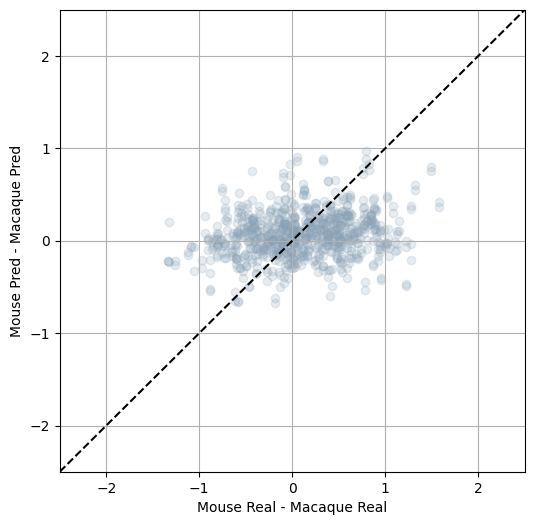

kf8188qf
# of same sign for true difference and predicted difference: 464 / 798 = 0.581453634085213 %
# of same sign for true difference and averaged predicted difference: 234 / 399.0 = 0.5864661654135338%
Pearson correlation coefficient: 0.2413, p-value: 4.931e-12
Spearman correlation coefficient: 0.2305, p-value: 4.41e-11
None


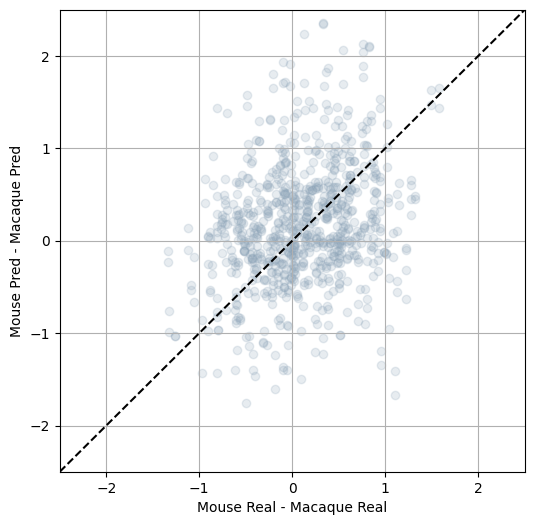

cq45eb2s
# of same sign for true difference and predicted difference: 467 / 798 = 0.5852130325814536 %
# of same sign for true difference and averaged predicted difference: 231 / 399.0 = 0.5789473684210527%
Pearson correlation coefficient: 0.2453, p-value: 2.104e-12
Spearman correlation coefficient: 0.2259, p-value: 1.079e-10
None


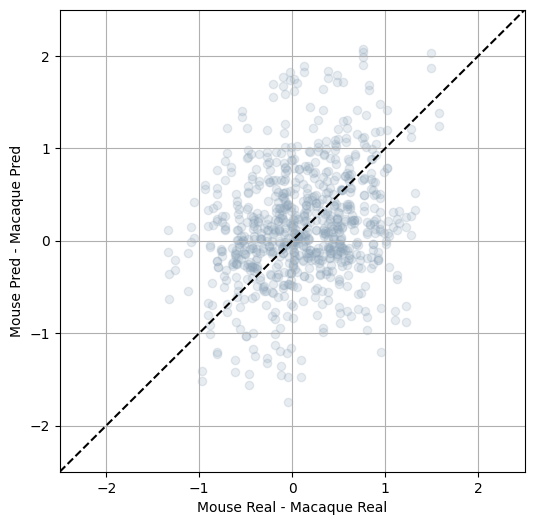

rat
bdbi7l3n
# of same sign for true difference and predicted difference: 789 / 1438 = 0.5486787204450626 %
# of same sign for true difference and averaged predicted difference: 398 / 719.0 = 0.5535465924895688%
Pearson correlation coefficient: 0.1773, p-value: 1.264e-11
Spearman correlation coefficient: 0.1527, p-value: 5.891e-09
None


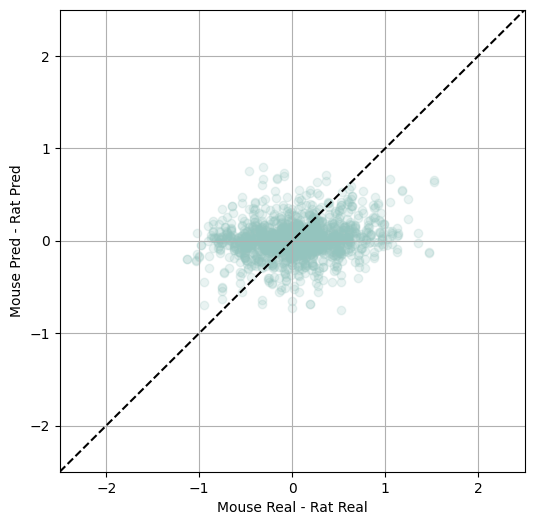

kf8188qf
# of same sign for true difference and predicted difference: 852 / 1438 = 0.5924895688456189 %
# of same sign for true difference and averaged predicted difference: 424 / 719.0 = 0.5897079276773296%
Pearson correlation coefficient: 0.2935, p-value: 5.836e-30
Spearman correlation coefficient: 0.2811, p-value: 1.622e-27
None


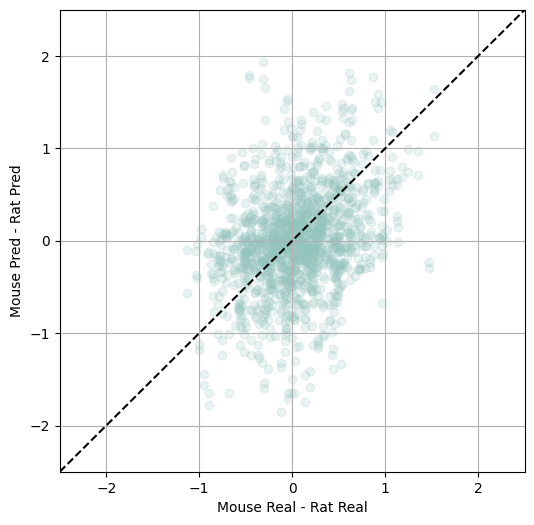

cq45eb2s
# of same sign for true difference and predicted difference: 849 / 1438 = 0.5904033379694019 %
# of same sign for true difference and averaged predicted difference: 432 / 719.0 = 0.6008344923504868%
Pearson correlation coefficient: 0.2850, p-value: 2.786e-28
Spearman correlation coefficient: 0.2619, p-value: 5.544e-24
None


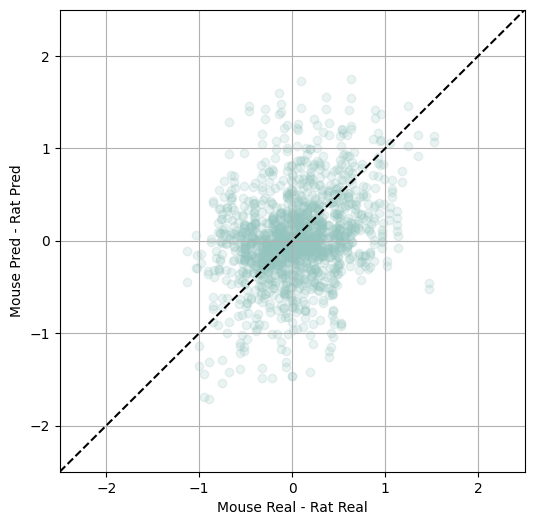

cow
bdbi7l3n
# of same sign for true difference and predicted difference: 358 / 618 = 0.5792880258899676 %
# of same sign for true difference and averaged predicted difference: 173 / 309.0 = 0.5598705501618123%
Pearson correlation coefficient: 0.2015, p-value: 4.4e-07
Spearman correlation coefficient: 0.2284, p-value: 9.292e-09
None


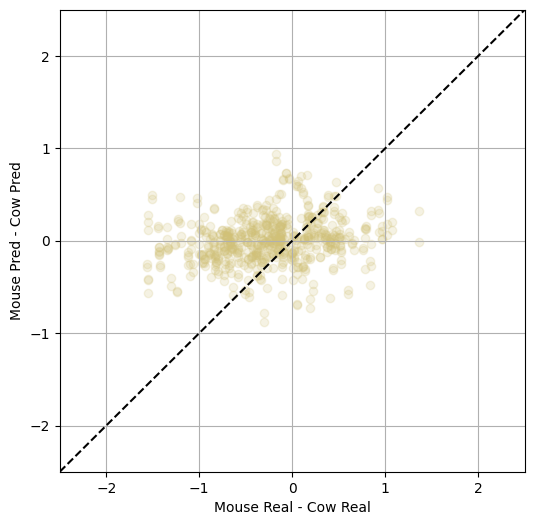

kf8188qf
# of same sign for true difference and predicted difference: 364 / 618 = 0.5889967637540453 %
# of same sign for true difference and averaged predicted difference: 181 / 309.0 = 0.5857605177993528%
Pearson correlation coefficient: 0.3402, p-value: 3.319e-18
Spearman correlation coefficient: 0.3543, p-value: 1.023e-19
None


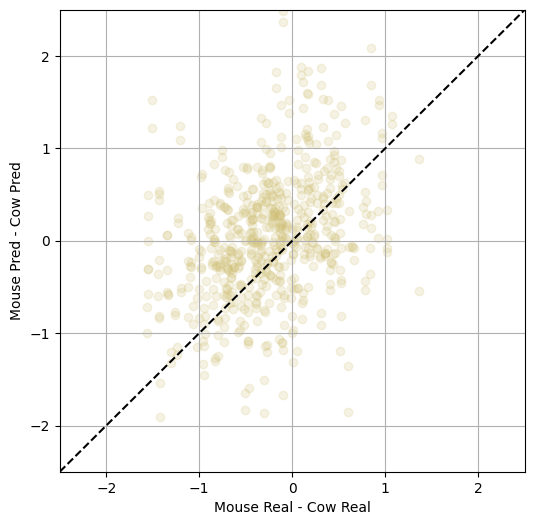

cq45eb2s
# of same sign for true difference and predicted difference: 365 / 618 = 0.5906148867313916 %
# of same sign for true difference and averaged predicted difference: 183 / 309.0 = 0.5922330097087378%
Pearson correlation coefficient: 0.3089, p-value: 3.954e-15
Spearman correlation coefficient: 0.3295, p-value: 4.081e-17
None


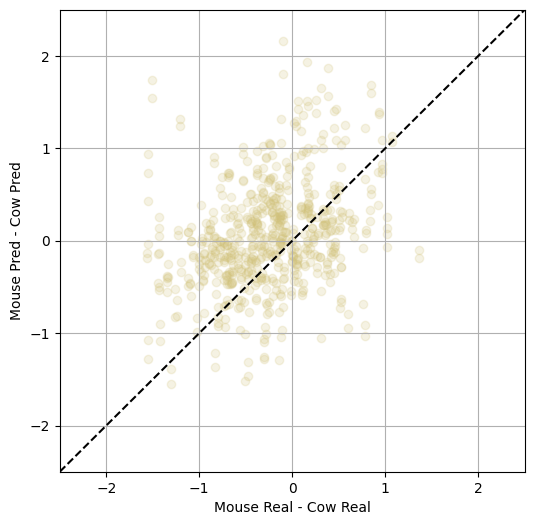

pig
bdbi7l3n
# of same sign for true difference and predicted difference: 285 / 544 = 0.5238970588235294 %
# of same sign for true difference and averaged predicted difference: 141 / 272.0 = 0.5183823529411765%
Pearson correlation coefficient: 0.2493, p-value: 3.776e-09
Spearman correlation coefficient: 0.1952, p-value: 4.491e-06
None


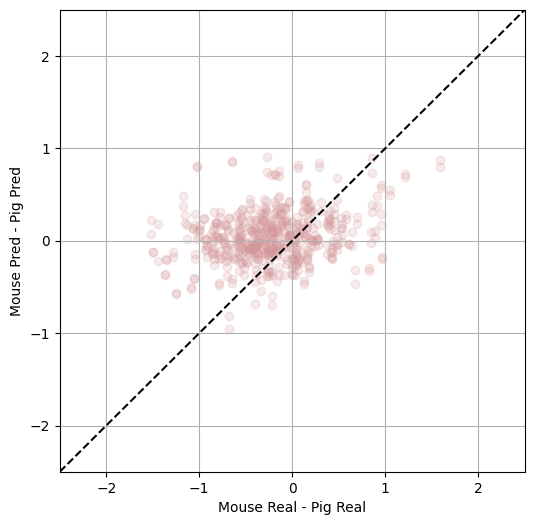

kf8188qf
# of same sign for true difference and predicted difference: 267 / 544 = 0.49080882352941174 %
# of same sign for true difference and averaged predicted difference: 135 / 272.0 = 0.4963235294117647%
Pearson correlation coefficient: 0.1556, p-value: 0.00027
Spearman correlation coefficient: 0.1235, p-value: 0.003902
None


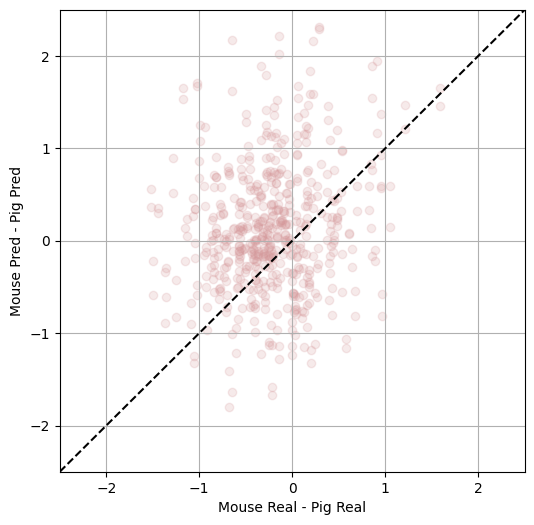

cq45eb2s
# of same sign for true difference and predicted difference: 292 / 544 = 0.5367647058823529 %
# of same sign for true difference and averaged predicted difference: 144 / 272.0 = 0.5294117647058824%
Pearson correlation coefficient: 0.2193, p-value: 2.397e-07
Spearman correlation coefficient: 0.1802, p-value: 2.353e-05
None


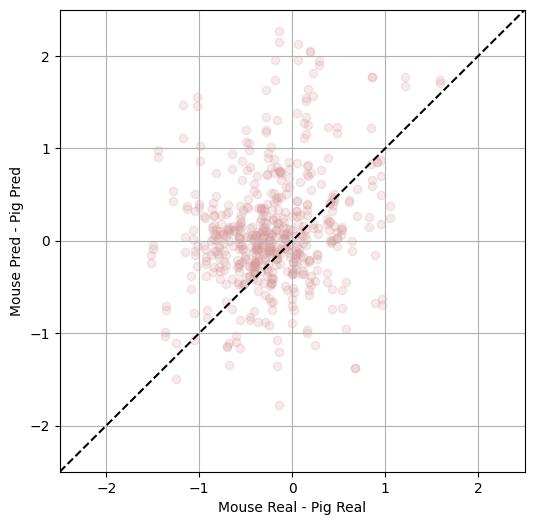

In [18]:
# FOLDCHANGE
direc = 'foldchange/'

# species = 'macaque'
# model = 'bdbi7l3n'

species_list = ['macaque', 'rat', 'cow', 'pig']

model_list = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s']


mouse_real_neg=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/mouse_liver_TEST_500bp.bed', sep="\t", header=None)
mouse_real_pos=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/mouse_liver_TEST_500bp.bed', sep="\t", header=None)

real_neg_len = 2*len(mouse_real_neg)
real_pos_len = 2*len(mouse_real_pos)

for species in species_list:
    print(species)
    mac_qn = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', sep="\t", header=None)
    mouse_qn = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed', sep="\t", header=None)
    one_to_one_peaks = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/oneToOnePeaks/{species}_mouse.bed', header=None, sep='\t')
    
    peaks = one_to_one_peaks[[4, 14]]

    merged_df = peaks.merge(mac_qn, how='left', left_on=4, right_on=3, suffixes=('', '_mac'))
    merged_df = merged_df.merge(mouse_qn, how='left', left_on=14, right_on=3, suffixes=('_MAC', '_mouse'))
    
    for model in model_list:
        print(model)

        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        # val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, sep="\t").rename(columns={0: 'mac_chr'})
        
        val1_len = 2*len(val1_df)
        val2_len = 2*len(val2_df)

        doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)

        pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len].reset_index(drop=True)
        
        doubled_combined = pd.concat([doubled_val2_df, pred_val2_df], axis=1)
        
        mac_val2_real_pred = doubled_combined.rename(columns={4: 'mac_true', 0:'mac_pred'})
        
        merged_mac_real_pred = peaks.merge(mac_val2_real_pred, how='left', left_on=4, right_on=3).drop(14, axis=1)
        m_mac_pred = merged_mac_real_pred.rename(columns={3:'mac_peak'}).drop(4, axis=1)




        mouse_pred = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_mouse_TEST.csv', sep="\t", header=None)


        mouse_pred_pos = mouse_pred.head(real_pos_len).reset_index(drop=True)
        
        doubled_mouse_real_pos = pd.concat([mouse_real_pos, mouse_real_pos]).sort_index(kind='mergesort').reset_index(drop=True)
        
        
        doubled_mouse_real_pos = doubled_mouse_real_pos.rename(columns={0:'mouse_chr'})
        mouse_pos_real_pred = pd.concat([doubled_mouse_real_pos.drop(columns=5), mouse_pred_pos], axis=1)
        mouse_pos_real_pred = mouse_pos_real_pred.rename(columns={4:'mouse_true', 0:'mouse_pred'}).reset_index(drop=True)
        
        
        merged_mouse_pred = peaks.merge(mouse_pos_real_pred, how='left', left_on=14, right_on=3)
        
        m_mouse_pred = merged_mouse_pred.rename(columns={3:'mouse_peak'}).drop([14], axis=1)

####################### make bigboss mouse + query predicted and real info

        bigboss = pd.concat([m_mouse_pred, m_mac_pred], axis=1)
        
        bigboss['true'] = bigboss['mouse_true']-bigboss['mac_true']
        bigboss['pred'] = bigboss['mouse_pred']-bigboss['mac_pred']
        
        mouse_av = (bigboss.loc[::2, 'mouse_pred'].values + bigboss.loc[1::2, 'mouse_pred'].values) / 2
        mac_av = (bigboss.loc[::2, 'mac_pred'].values + bigboss.loc[1::2, 'mac_pred'].values) / 2
        
        # Add the averages back to the DataFrame as a new column
        bigboss.loc[::2, 'mouse_pred_avg'] = mouse_av  # Assign averages to even indices only
        bigboss.loc[::2, 'mac_pred_avg'] = mac_av 
        bigboss['avg_pred'] = bigboss['mouse_pred_avg']-bigboss['mac_pred_avg']
        
        
        same_sign = np.sign(bigboss['true']) == np.sign(bigboss['pred'])
        print(f'# of same sign for true difference and predicted difference: {same_sign.sum()} / {len(bigboss)} = {same_sign.sum() / len(bigboss)} %')
        
        same_sign = np.sign(bigboss.loc[::2]['true']) == np.sign(bigboss.loc[::2]['avg_pred'])
        print(f'# of same sign for true difference and averaged predicted difference: {same_sign.sum()} / {len(bigboss) / 2} = {same_sign.sum() / (len(bigboss) / 2)}%')
        
        x = bigboss['true']
        y = bigboss['pred']
        
        print(pearson_spearman(x, y))

        plt.figure(figsize=(6, 6))
        plt.axhspan(0, 2.5, xmin=0, xmax=1, color=lights[species.capitalize()], alpha=0.1)  # 1st quadrant
        plt.axhspan(-2.5, 0, xmin=0, xmax=1, color=lights[species.capitalize()], alpha=0.1)  # 3rd quadrant

        plt.axis([-2.5, 2.5, -2.5, 2.5])
        plt.scatter(x, y, alpha=0.2, color=colors[species.capitalize()])
        plt.plot([-2.5, 2.5], [-2.5, 2.5], color='black', linestyle='--', label='y = x')
        plt.xlabel(f'Mouse Real - {species.capitalize()} Real')
        plt.ylabel(f'Mouse Pred - {species.capitalize()} Pred')
        # plt.title(f'Foldchange diff in real vs. predicted for model: {model}')
        plt.savefig(f"{thesis_dir}{direc}{species}_{model}_basic.png", dpi=300, bbox_inches='tight')
        plt.show()

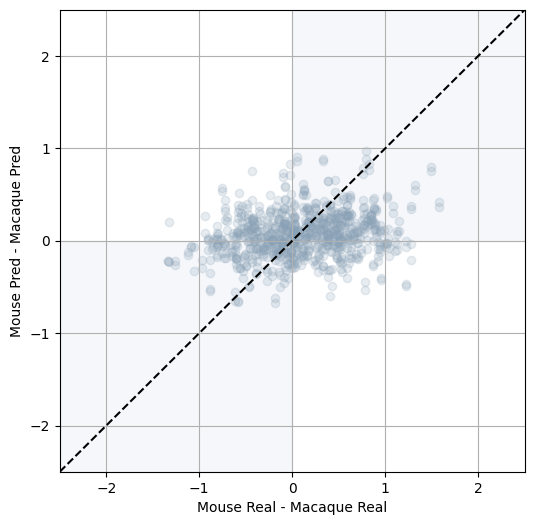

In [14]:

plt.figure(figsize=(6, 6))
# plt.axhspan(0, 2.5, xmin=0, xmax=1, color=lights[species.capitalize()], alpha=0.1)  # 1st quadrant
# plt.axhspan(-2.5, 0, xmin=0, xmax=1, color=lights[species.capitalize()], alpha=0.1)  # 3rd quadrant
# plt.axhspan(0, 2.5, xmin=0, xmax=0.5, color=None, alpha=0.1)  # 2nd
# plt.axhspan(-2.5, 0, xmin=0.5, xmax=1, color=None, alpha=0.1)
plt.axvspan(0, 2.5, ymin=0.5, ymax=1, color=lights[species.capitalize()], alpha=0.1)  # 1st quadrant
plt.axvspan(-2.5, 0, ymin=0, ymax=0.5, color=lights[species.capitalize()], alpha=0.1) 
plt.axis([-2.5, 2.5, -2.5, 2.5])
plt.scatter(x, y, alpha=0.2, color=colors[species.capitalize()])
plt.plot([-2.5, 2.5], [-2.5, 2.5], color='black', linestyle='--', label='y = x')
plt.xlabel(f'Mouse Real - {species.capitalize()} Real')
plt.ylabel(f'Mouse Pred - {species.capitalize()} Pred')
# plt.title(f'Foldchange diff in real vs. predicted for model: {model}')
plt.grid(True)
# plt.savefig(f"{thesis_dir}{direc}{species}_{model}_coloured_quadrants.png", dpi=300, bbox_inches='tight')
plt.show()